# NLP - Review Classification - BOW_DecisionTreeClassifier-Based model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the Reviews in form of tsv

In [2]:
dataset = pd.read_csv('Restaurant_Reviews.tsv',delimiter='\t',quoting=3)

In [21]:
dataset.head(10)

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


### Cleaning the text  

In [3]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

corpus = []
for i in range(0,dataset.shape[0]):
    review = dataset.Review[i].lower()
    review = re.sub('[^a-z]',' ',review)
    review = review.split()
    
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\studa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Creating Bag Of Words model

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)
X  = cv.fit_transform(corpus).toarray()
y  = dataset.iloc[:,-1].values

### Splitting the Dataset into training set and testing set

In [5]:
#80% 20% train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

### Fitting the RandomforestClassifier on the training set

In [13]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=500,criterion='entropy',max_depth=13)
classifier.fit(x_train,y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=13, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [14]:
# predicting the testset values
y_pred = classifier.predict(x_test)
# printing score
print(classifier.score(x_test,y_test))

0.76


### Evaluating using confusion matrix

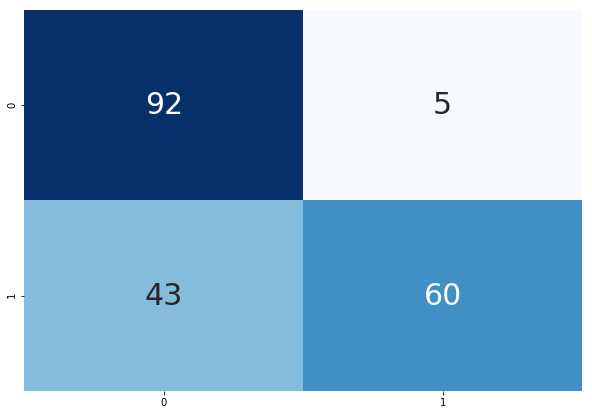

In [22]:
from sklearn.metrics import confusion_matrix,f1_score,precision_score,recall_score
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,annot_kws={'size':30},cbar=False,cmap="Blues")
plt.show()

In [32]:
precision_score(y_test,y_pred)

0.9230769230769231

In [31]:
recall_score(y_test,y_pred)

0.5825242718446602

In [35]:
f1_score(y_test,y_pred)

0.7142857142857142